In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [3]:
client_data = pd.read_csv('client_data.csv')
price_data = pd.read_csv('price_data.csv')

### Data Documentation:

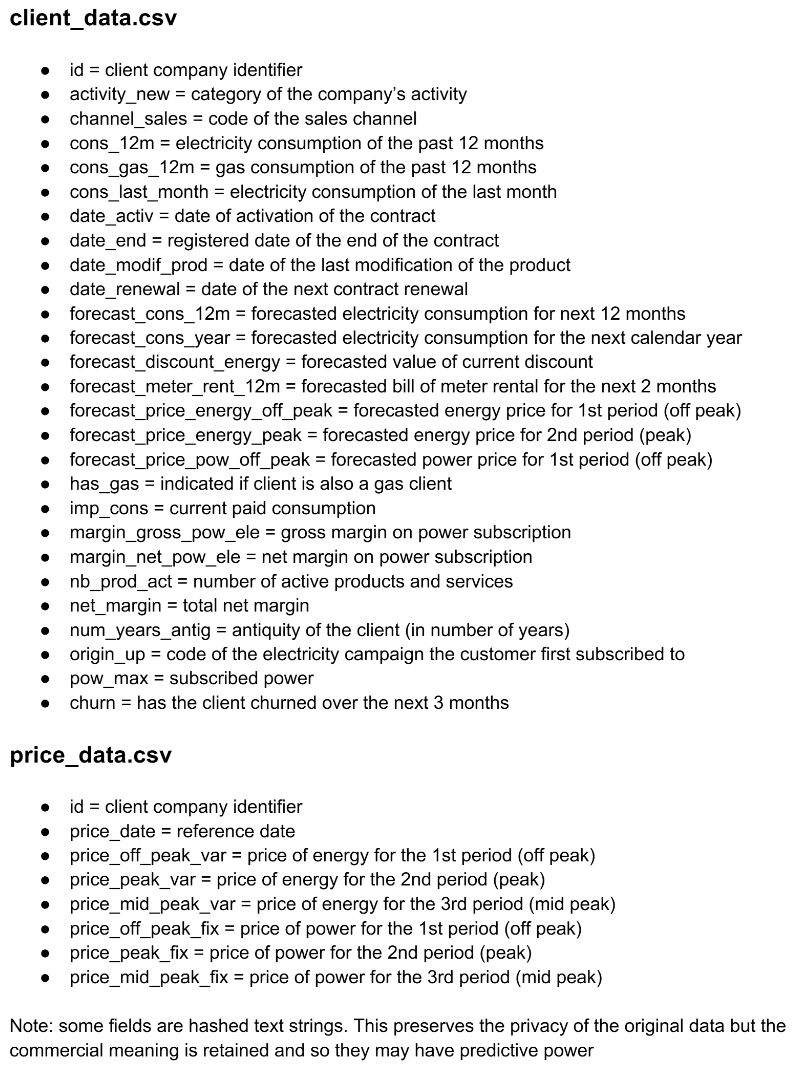

### First look at the data

In [4]:
print(client_data.size)
print(client_data.id.unique().size)

379756
14606


In [5]:
client_data.head(4)

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648,1
1,d29c2c54acc38ff3c0614d0a653813dd,MISSING,4660,0,0,2009-08-21,2016-08-30,2009-08-21,2015-08-31,189.95,...,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800,0
2,764c75f661154dac3a6c254cd082ea7d,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,2010-04-16,2015-04-17,47.96,...,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856,0
3,bba03439a292a1e166f80264c16191cb,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,2010-03-30,2015-03-31,240.04,...,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200,0


In [6]:
client_data.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

In [7]:
print(f'Contract dates range from {client_data["date_activ"].min()} to {client_data["date_end"].max()}')

Contract dates range from 2003-05-09 to 2017-06-13


In [29]:
client_data[client_data['churn'] == 1]['date_renewal'].sort_values(ascending=False).head(25)

12440    2016-01-28
8053     2016-01-28
9753     2016-01-28
8421     2016-01-26
7189     2016-01-26
10279    2016-01-26
2206     2016-01-26
9752     2016-01-26
10309    2016-01-26
11366    2016-01-26
7556     2016-01-26
7074     2016-01-25
2450     2016-01-24
7695     2016-01-24
2615     2016-01-24
6065     2016-01-24
3129     2016-01-24
10676    2016-01-24
10715    2016-01-24
11438    2016-01-24
7065     2016-01-22
110      2016-01-22
10933    2016-01-21
6102     2016-01-21
9871     2016-01-21
Name: date_renewal, dtype: object

#### Latest contract renewals are on the 28th of January, 2016. Will use this day as the reference date for 'today'.

In [8]:
client_data[(client_data['cons_12m'] == 0) & (client_data['cons_gas_12m'] == 0) & (client_data['cons_last_month'] == 0) & (client_data['forecast_cons_12m'] > 0)][['cons_12m', 'cons_gas_12m', 'cons_last_month', 'forecast_cons_12m']]

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m
459,0,0,0,1453.16
1178,0,0,0,1158.73
3331,0,0,0,870.18
3870,0,0,0,2344.11
4287,0,0,0,918.57
4394,0,0,0,866.77
4927,0,0,0,837.56
6206,0,0,0,870.61
6281,0,0,0,3534.24
6916,0,0,0,1581.12


#### Some clients haven't consumed anything for the past year but still have forecasted consumption? Odd.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [9]:
print(price_data.size)
print(price_data.id.unique().size)

1544016
16096


In [10]:
price_data.head(4)

,id,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [11]:
price_data.isnull().sum()

id                    0
price_date            0
price_off_peak_var    0
price_peak_var        0
price_mid_peak_var    0
price_off_peak_fix    0
price_peak_fix        0
price_mid_peak_fix    0
dtype: int64

### Immediately noticed:

#### 1. Client data contains our variable of interest 'churn', as well as some quant/qualitative variables.

#### 2. There are no Nan values in the dataframes, but some columns have values labeled 'MISSING'.

#### 3. Many of the values in both the price and client data for certain quantitative variables are 0.

In [12]:
print(client_data[client_data['channel_sales'] == 'MISSING'].size)
print(client_data[client_data['origin_up'] == 'MISSING'].size)

96850
1664


#### Around 1/4 of the data is missing the sales channel.

#### A small amount is missing the code of the electricy campaign first subscribed to.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Descriptive Statistics

In [13]:
client_data.describe()

,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_off_peak,forecast_price_energy_peak,forecast_price_pow_off_peak,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,1.460600e+04,1.460600e+04,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000,14606.000000
mean,1.592203e+05,2.809238e+04,16090.269752,1868.614880,1399.762906,0.966726,63.086871,0.137283,0.050491,43.130056,152.786896,24.565121,24.562517,1.292346,189.264522,4.997809,18.135136,0.097152
std,5.734653e+05,1.629731e+05,64364.196422,2387.571531,3247.786255,5.108289,66.165783,0.024623,0.049037,4.485988,341.369366,20.231172,20.230280,0.709774,311.798130,1.611749,13.534743,0.296175
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,3.300000,0.000000
25%,5.674750e+03,0.000000e+00,0.000000,494.995000,0.000000,0.000000,16.180000,0.116340,0.000000,40.606701,0.000000,14.280000,14.280000,1.000000,50.712500,4.000000,12.500000,0.000000
50%,1.411550e+04,0.000000e+00,792.500000,1112.875000,314.000000,0.000000,18.795000,0.143166,0.084138,44.311378,37.395000,21.640000,21.640000,1.000000,112.530000,5.000000,13.856000,0.000000
75%,4.076375e+04,0.000000e+00,3383.000000,2401.790000,1745.750000,0.000000,131.030000,0.146348,0.098837,44.311378,193.980000,29.880000,29.880000,1.000000,243.097500,6.000000,19.172500,0.000000
max,6.207104e+06,4.154590e+06,771203.000000,82902.830000,175375.000000,30.000000,599.310000,0.273963,0.195975,59.266378,15042.790000,374.640000,374.640000,32.000000,24570.650000,13.000000,320.000000,1.000000


In [14]:
price_data.describe()

,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
count,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000,193002.000000
mean,0.141027,0.054630,0.030496,43.334477,10.622875,6.409984
std,0.025032,0.049924,0.036298,5.410297,12.841895,7.773592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101673,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Visualizations

#### Functions

In [15]:
def stacked_barplot(data, title, size=(18,10), rot=0, annot_color='white', textsize=12):
    sns.set_palette(['royalblue', 'darkorange'])
    ax = data.plot(kind='bar', stacked=True, figsize=size, rot=rot, title=title)
    annotate_bars(ax, textsize, annot_color)
    plt.legend(['Retention', 'Churn'])
    plt.ylabel('% of company base')
    plt.show()

def annotate_bars(ax, textsize, color):
    for p in ax.patches:
        value = str(round(p.get_height(), 1))
        if value != '0.0':
            ax.annotate(value, (p.get_x() + p.get_width()/2, p.get_y()+p.get_height()/2), ha='center', va='center', color=color, size=textsize)

def churnpct(data, col, sort=True):
    data = data[['id', col, 'churn', 'nonchurn']]
    data = data.groupby(col).apply(lambda x: [x['nonchurn'].sum()/x['id'].count()*100, x['churn'].sum()/x['id'].count()*100])
    data = pd.DataFrame(data.tolist(), index=data.index)
    if sort:
        data = data.sort_values(by=1, ascending=False)
    return data

def distribution_plot(data, var, ax, stacked=True):
    if stacked:
        sns.set_palette(['darkorange', 'royalblue'])
        temp = pd.DataFrame({'Churned': data[data['churn'] == 1][var], 'Retained': data[data['nonchurn'] == 1][var]})
        sns.histplot(temp, multiple='stack', bins='fd', ax=ax, alpha=1)
        sns.set_palette(['royalblue', 'darkorange'])
    else:
        sns.histplot(data[var], bins='fd', ax=ax, alpha=1)
    ax.set_xlabel(var)
    ax.legend()

sns.set_palette(['royalblue', 'darkorange'])

### Analyzing Churn

In [16]:
mask = client_data['churn'] == 0
client_data.loc[mask, 'nonchurn'] = 1
client_data.loc[~mask, 'nonchurn'] = 0

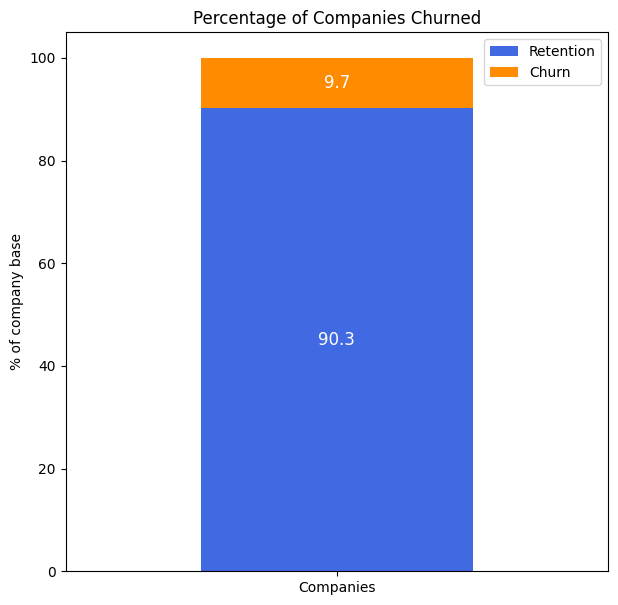

In [17]:
churn = client_data[['id', 'churn']]
churn = pd.DataFrame(churn.groupby('churn').apply(lambda x: x.size/churn.size*100), columns=['Companies']).T
stacked_barplot(churn, 'Percentage of Companies Churned', size=(7,7))

#### 10% of customers have churned according to the data.

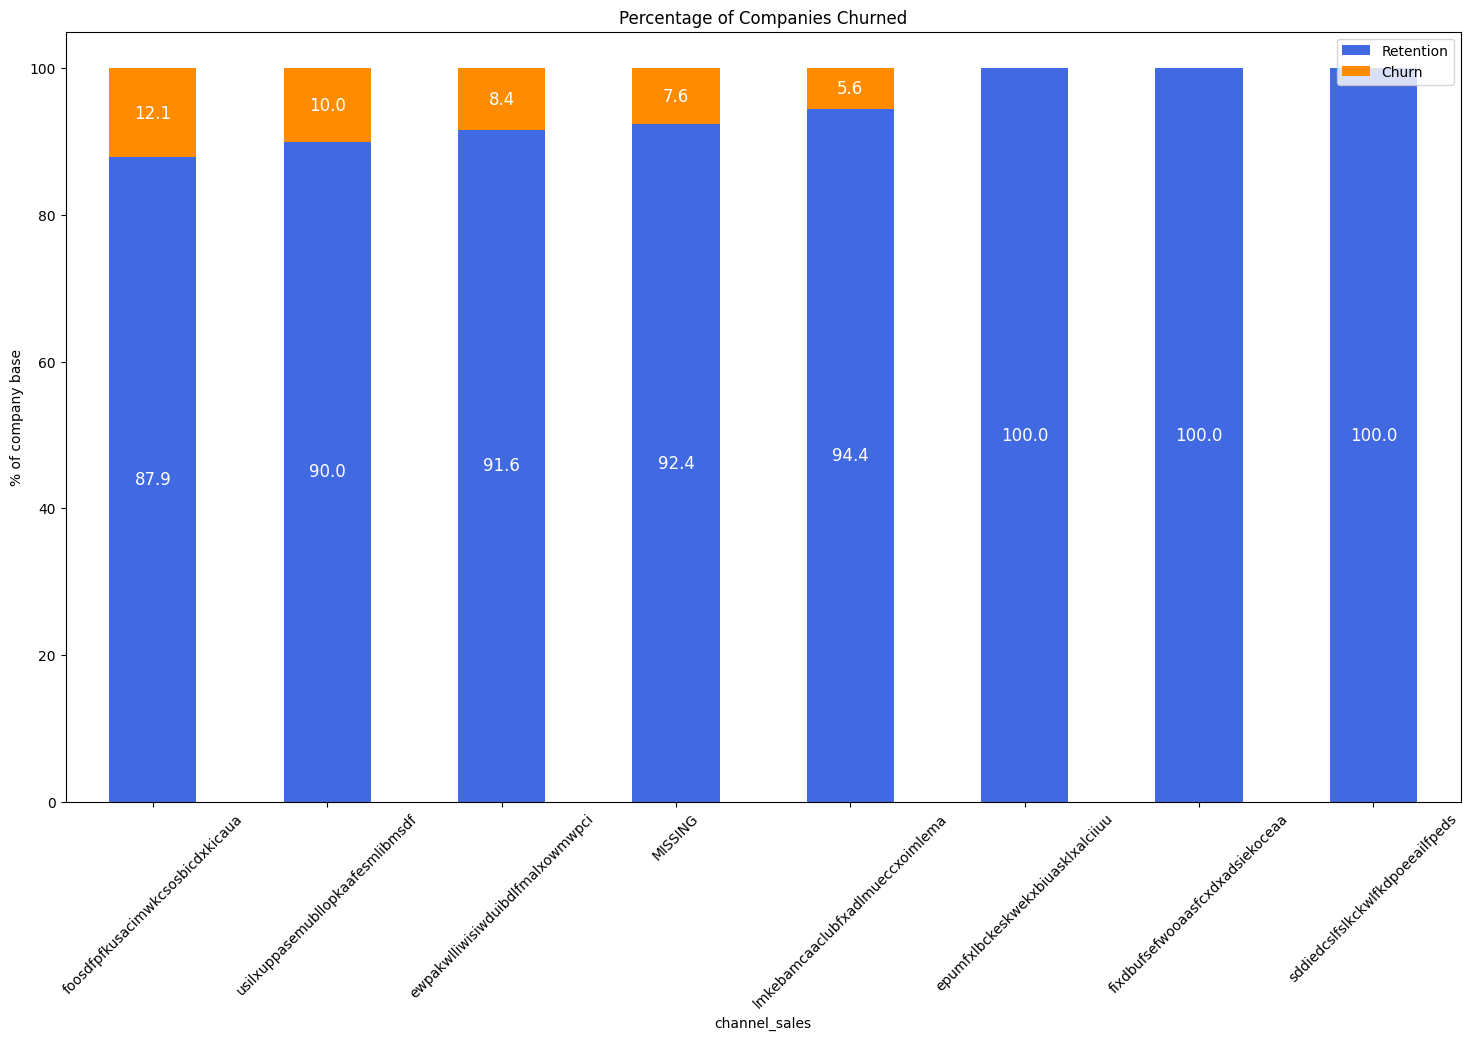

In [18]:
stacked_barplot(churnpct(client_data, 'channel_sales'), 'Percentage of Companies Churned', rot=45)

#### There seems to be a difference in churn percentage between the different sales channels.

In [19]:
from scipy.stats import chi2_contingency

churn = client_data[['id', 'channel_sales', 'churn', 'nonchurn']]
churn = churn.groupby('channel_sales').apply(lambda x: [x['nonchurn'].sum(), x['churn'].sum()])
churn = pd.DataFrame(churn.tolist(), columns=['nonchurn', 'churn'], index=churn.index).sort_values(by='churn', ascending=False)
test = chi2_contingency(churn.values)
print(f"{churn}\n\nChi-Square Statistic: {test[0]}\nP-Value: {test[1]}")

                                  nonchurn  churn
channel_sales                                    
foosdfpfkusacimwkcsosbicdxkicaua    5934.0    820
MISSING                             3442.0    283
usilxuppasemubllopkaafesmlibmsdf    1237.0    138
lmkebamcaaclubfxadlmueccxoimlema    1740.0    103
ewpakwlliwisiwduibdlfmalxowmwpci     818.0     75
epumfxlbckeskwekxbiuasklxalciiuu       3.0      0
fixdbufsefwooaasfcxdxadsiekoceaa       2.0      0
sddiedcslfslkckwlfkdpoeeailfpeds      11.0      0

Chi-Square Statistic: 103.78449544353441
P-Value: 1.7810651262162043e-19


#### The difference between sales channels is statistically significant.

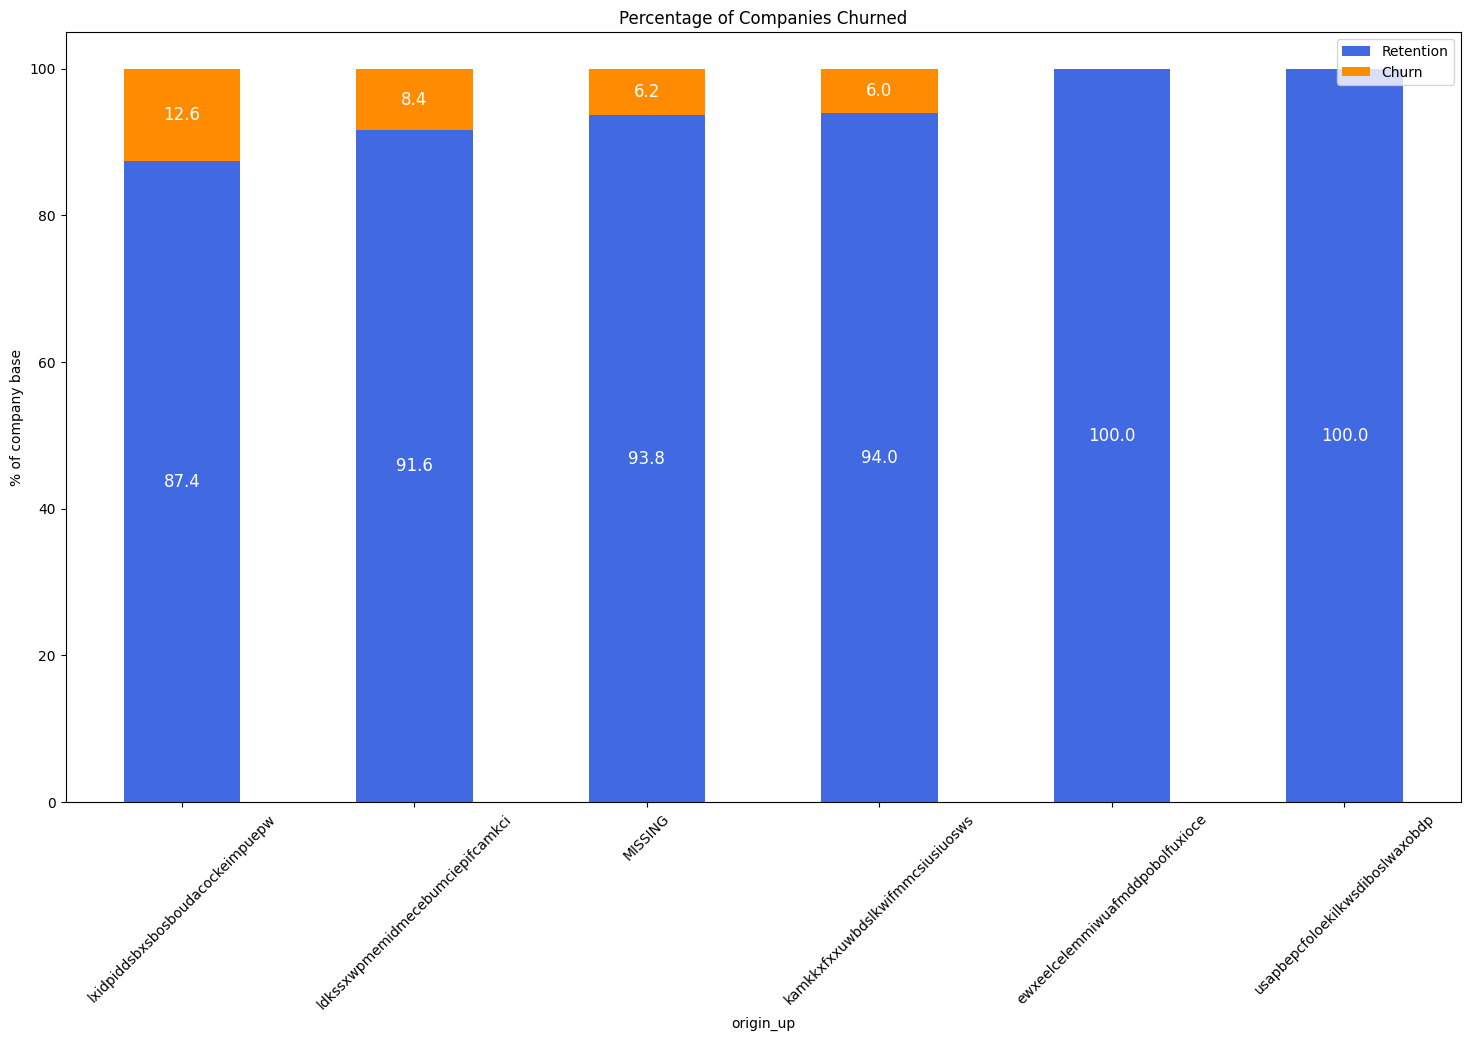

In [20]:
stacked_barplot(churnpct(client_data, 'origin_up'), 'Percentage of Companies Churned', rot=45)

#### The specific electricity campaigns seem to have a significant effect too.

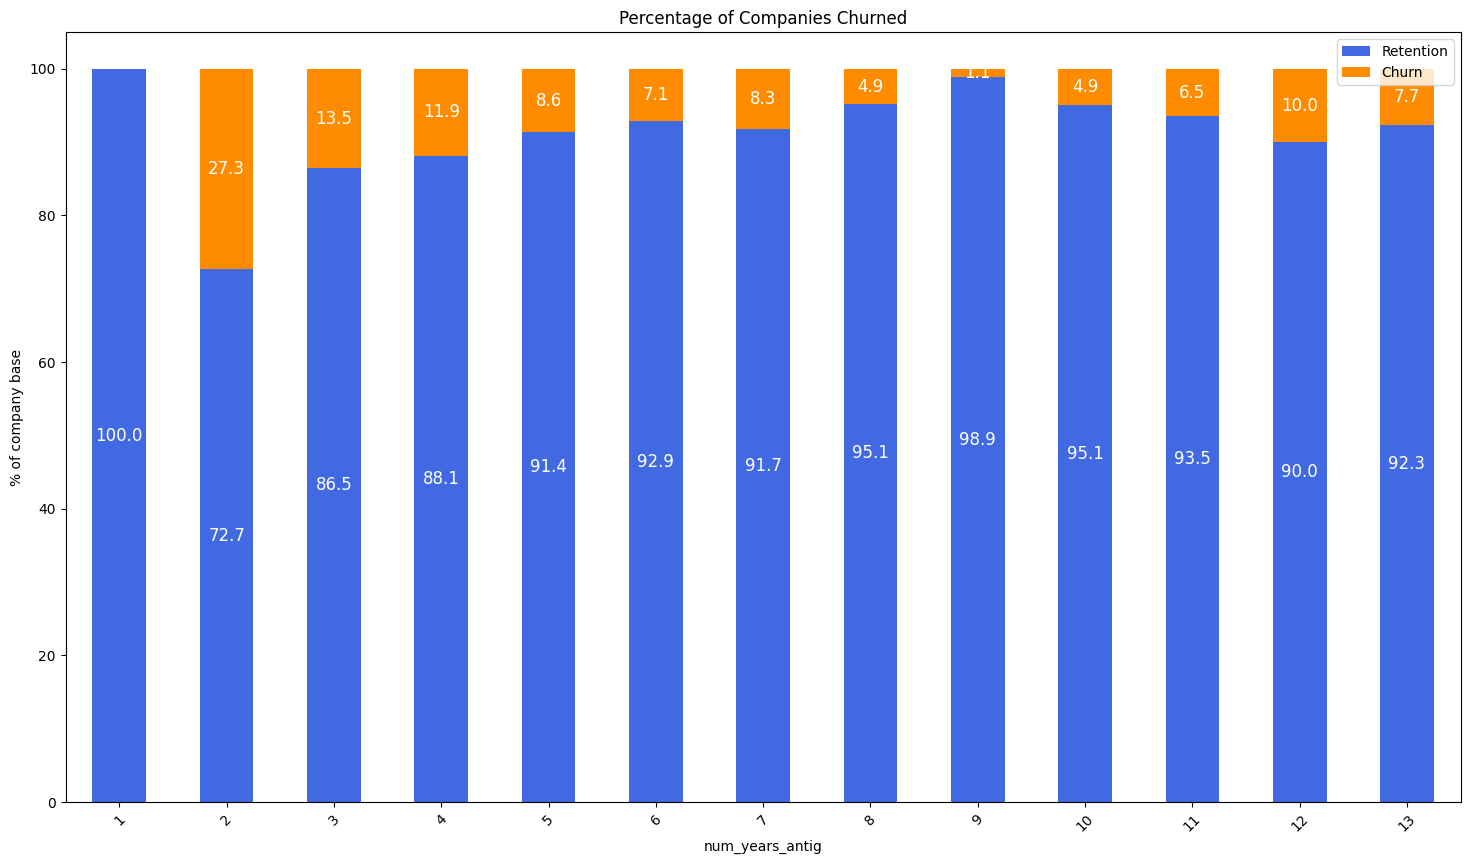

In [21]:
stacked_barplot(churnpct(client_data, 'num_years_antig', sort=False), 'Percentage of Companies Churned', rot=45)

#### The number of years a company has been with the utility company seems to have the largest effect on churn probability.

(only 1 company with one year)

In [22]:
churn = client_data[['id', 'num_years_antig', 'churn', 'nonchurn']]
churn = churn.groupby('num_years_antig').apply(lambda x: [x['nonchurn'].sum(), x['churn'].sum()])
pd.DataFrame(churn.tolist(), columns=['nonchurn', 'churn'], index=churn.index).sort_values(by='churn', ascending=False)

,nonchurn,churn
num_years_antig,,
4,3510.0,472
6,4430.0,339
3,2104.0,329
5,2117.0,200
7,467.0,42
11,173.0,12
12,99.0,11
8,98.0,5
10,77.0,4


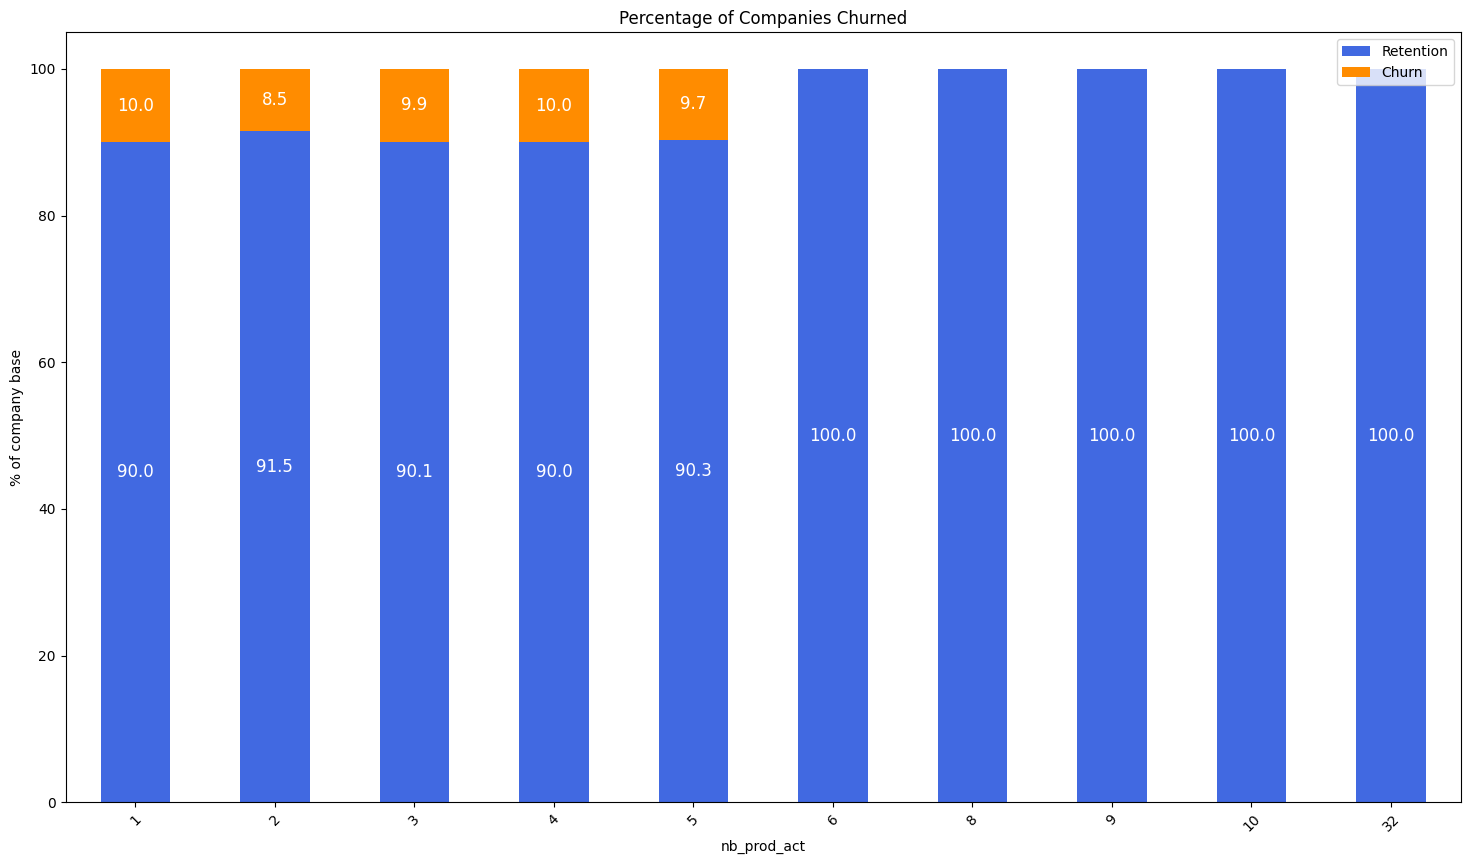

In [23]:
stacked_barplot(churnpct(client_data, 'nb_prod_act', sort=False), 'Percentage of Companies Churned', rot=45)

#### The number of products a customer uses doesn't seem to affect the chance of churning.

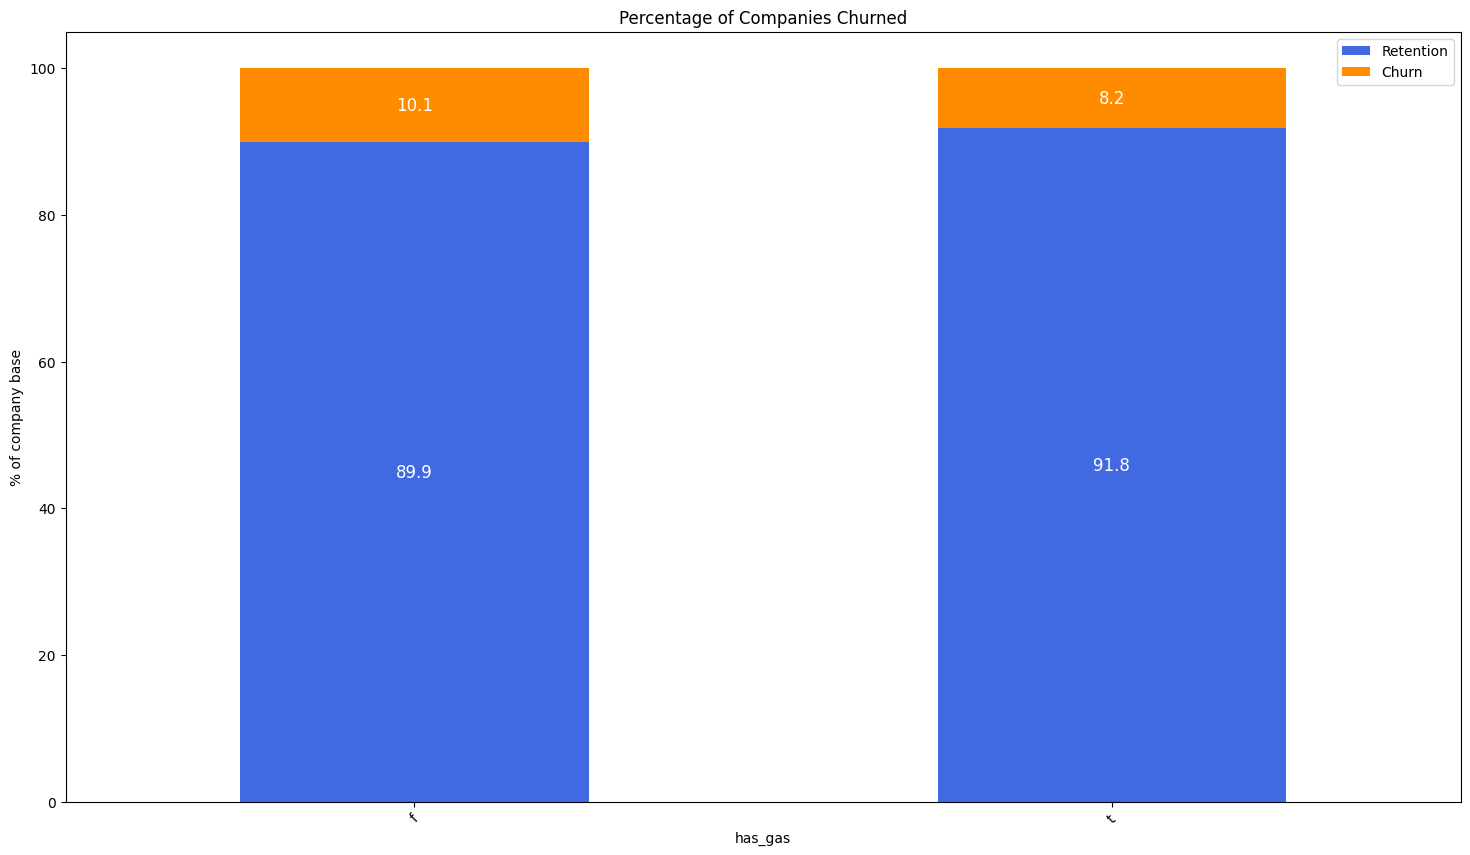

In [24]:
stacked_barplot(churnpct(client_data, 'has_gas', sort=False), 'Percentage of Companies Churned', rot=45)

#### Neither does the consumption of gas.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Distributions of quantitative variables

#### Current Data


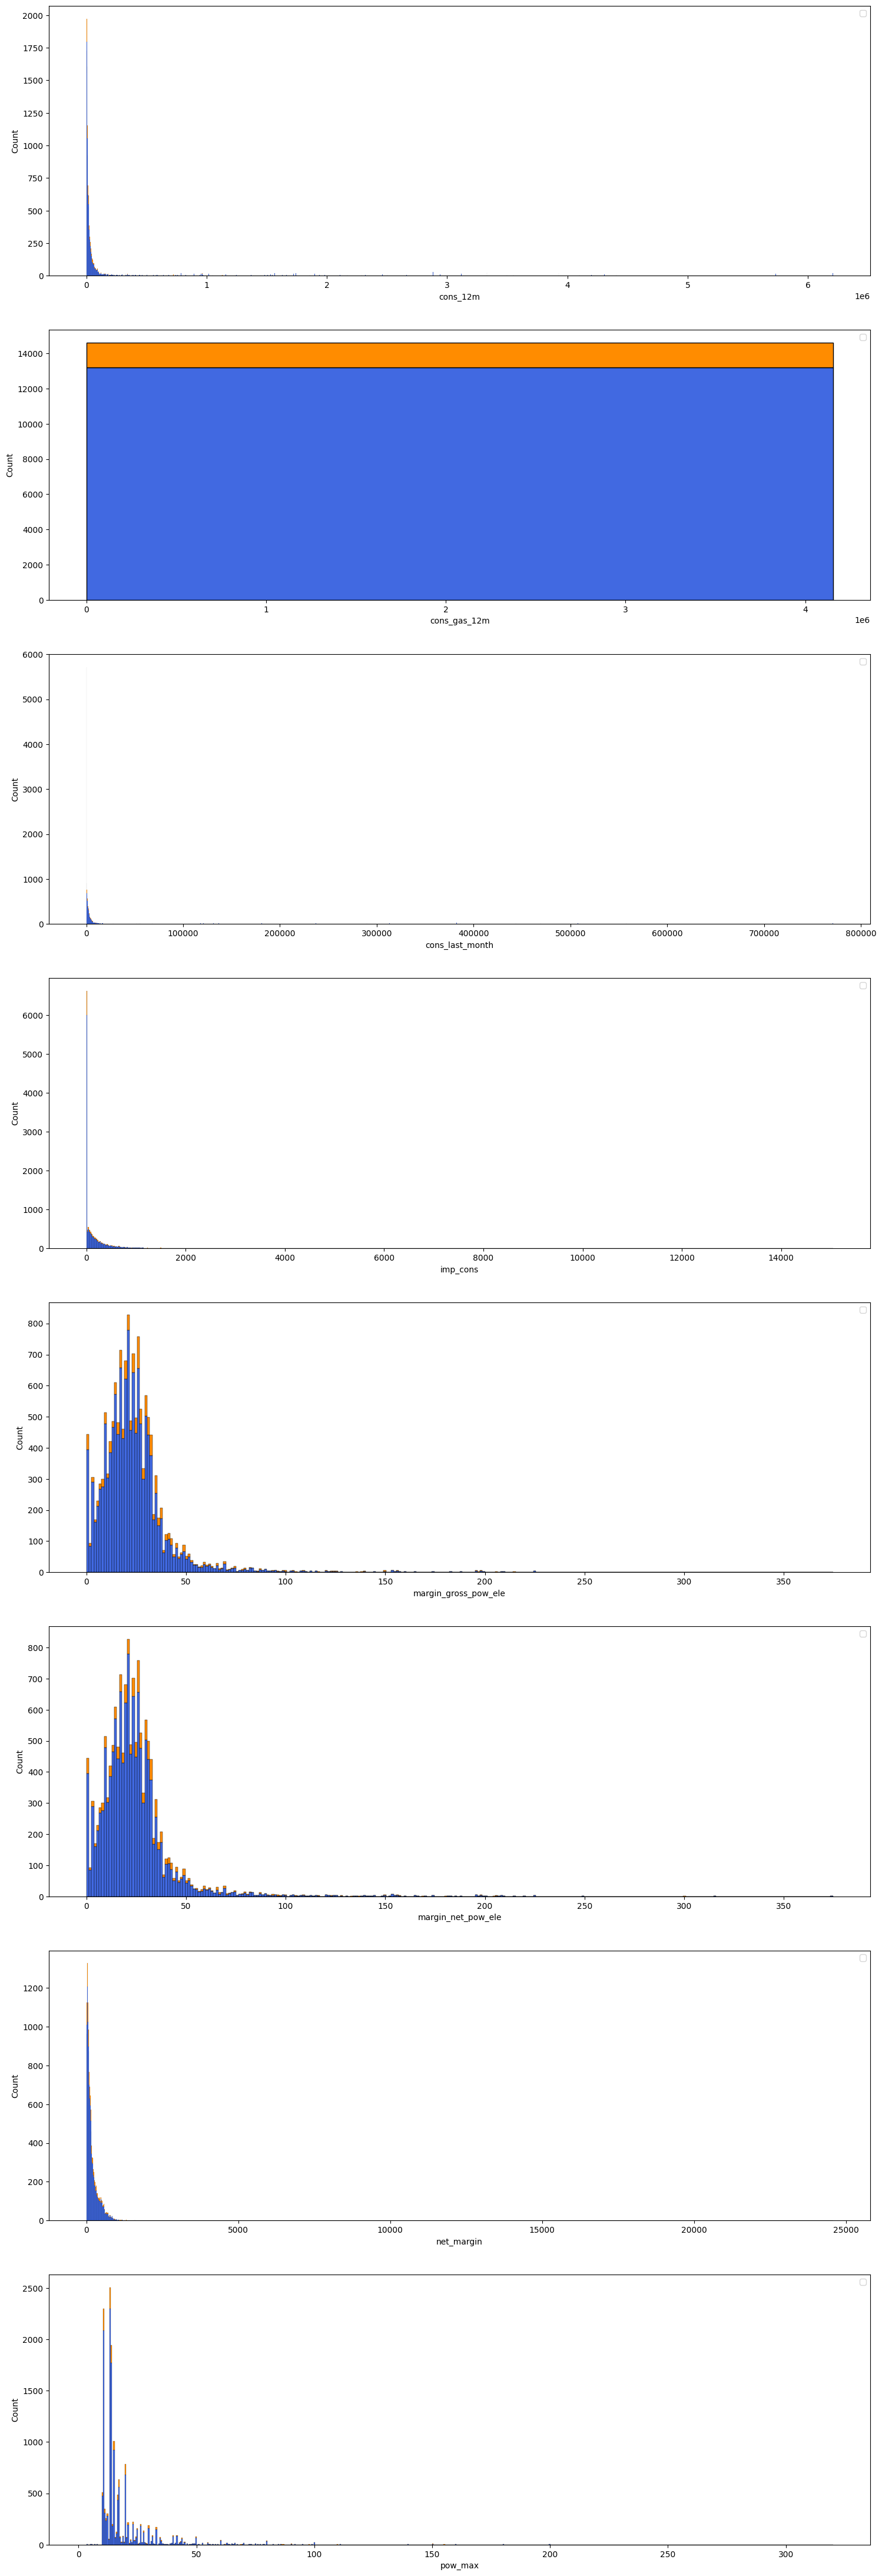

In [25]:
currentcols = ['cons_12m', 'cons_gas_12m', 'cons_last_month', 'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin', 'pow_max']
forecastedcols = ['forecast_cons_year', 'forecast_discount_energy', 'forecast_meter_rent_12m', 'forecast_price_energy_off_peak', 'forecast_price_energy_peak', 'forecast_price_pow_off_peak']

fig, axs = plt.subplots(nrows=len(currentcols), figsize=(18, len(currentcols)*7))

for i, col in dict(enumerate(currentcols)).items():
    distribution_plot(client_data, col, axs[i])

### Forecasted Variables

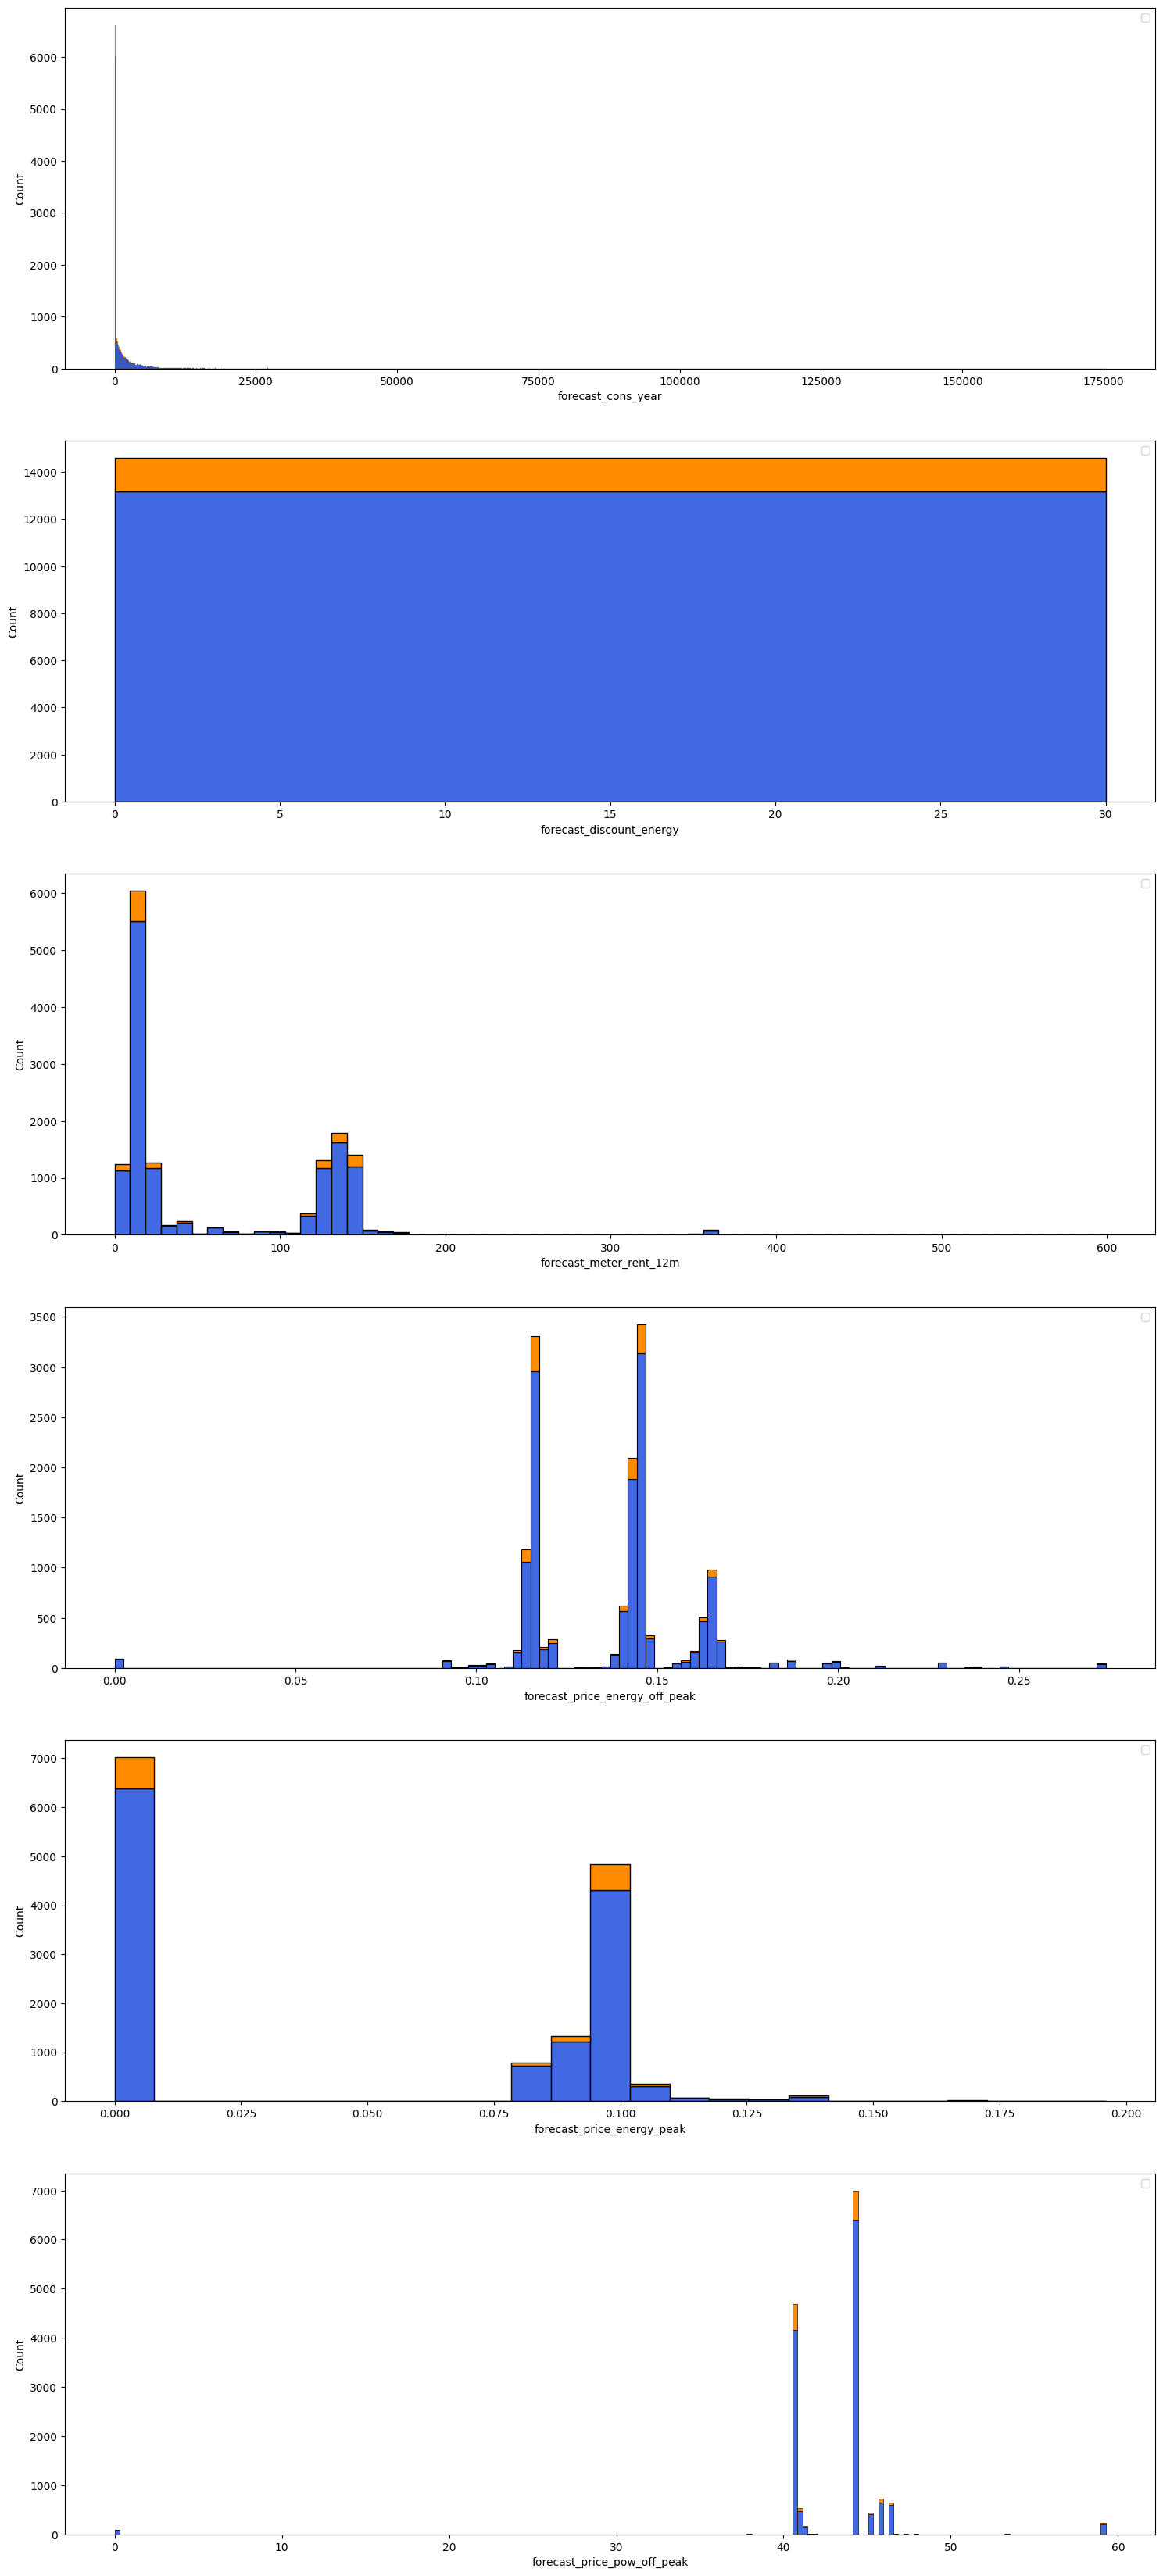

In [26]:
fig, axs = plt.subplots(nrows=len(forecastedcols), figsize=(18, len(forecastedcols)*7))

for i, col in dict(enumerate(forecastedcols)).items():
    distribution_plot(client_data, col, axs[i])

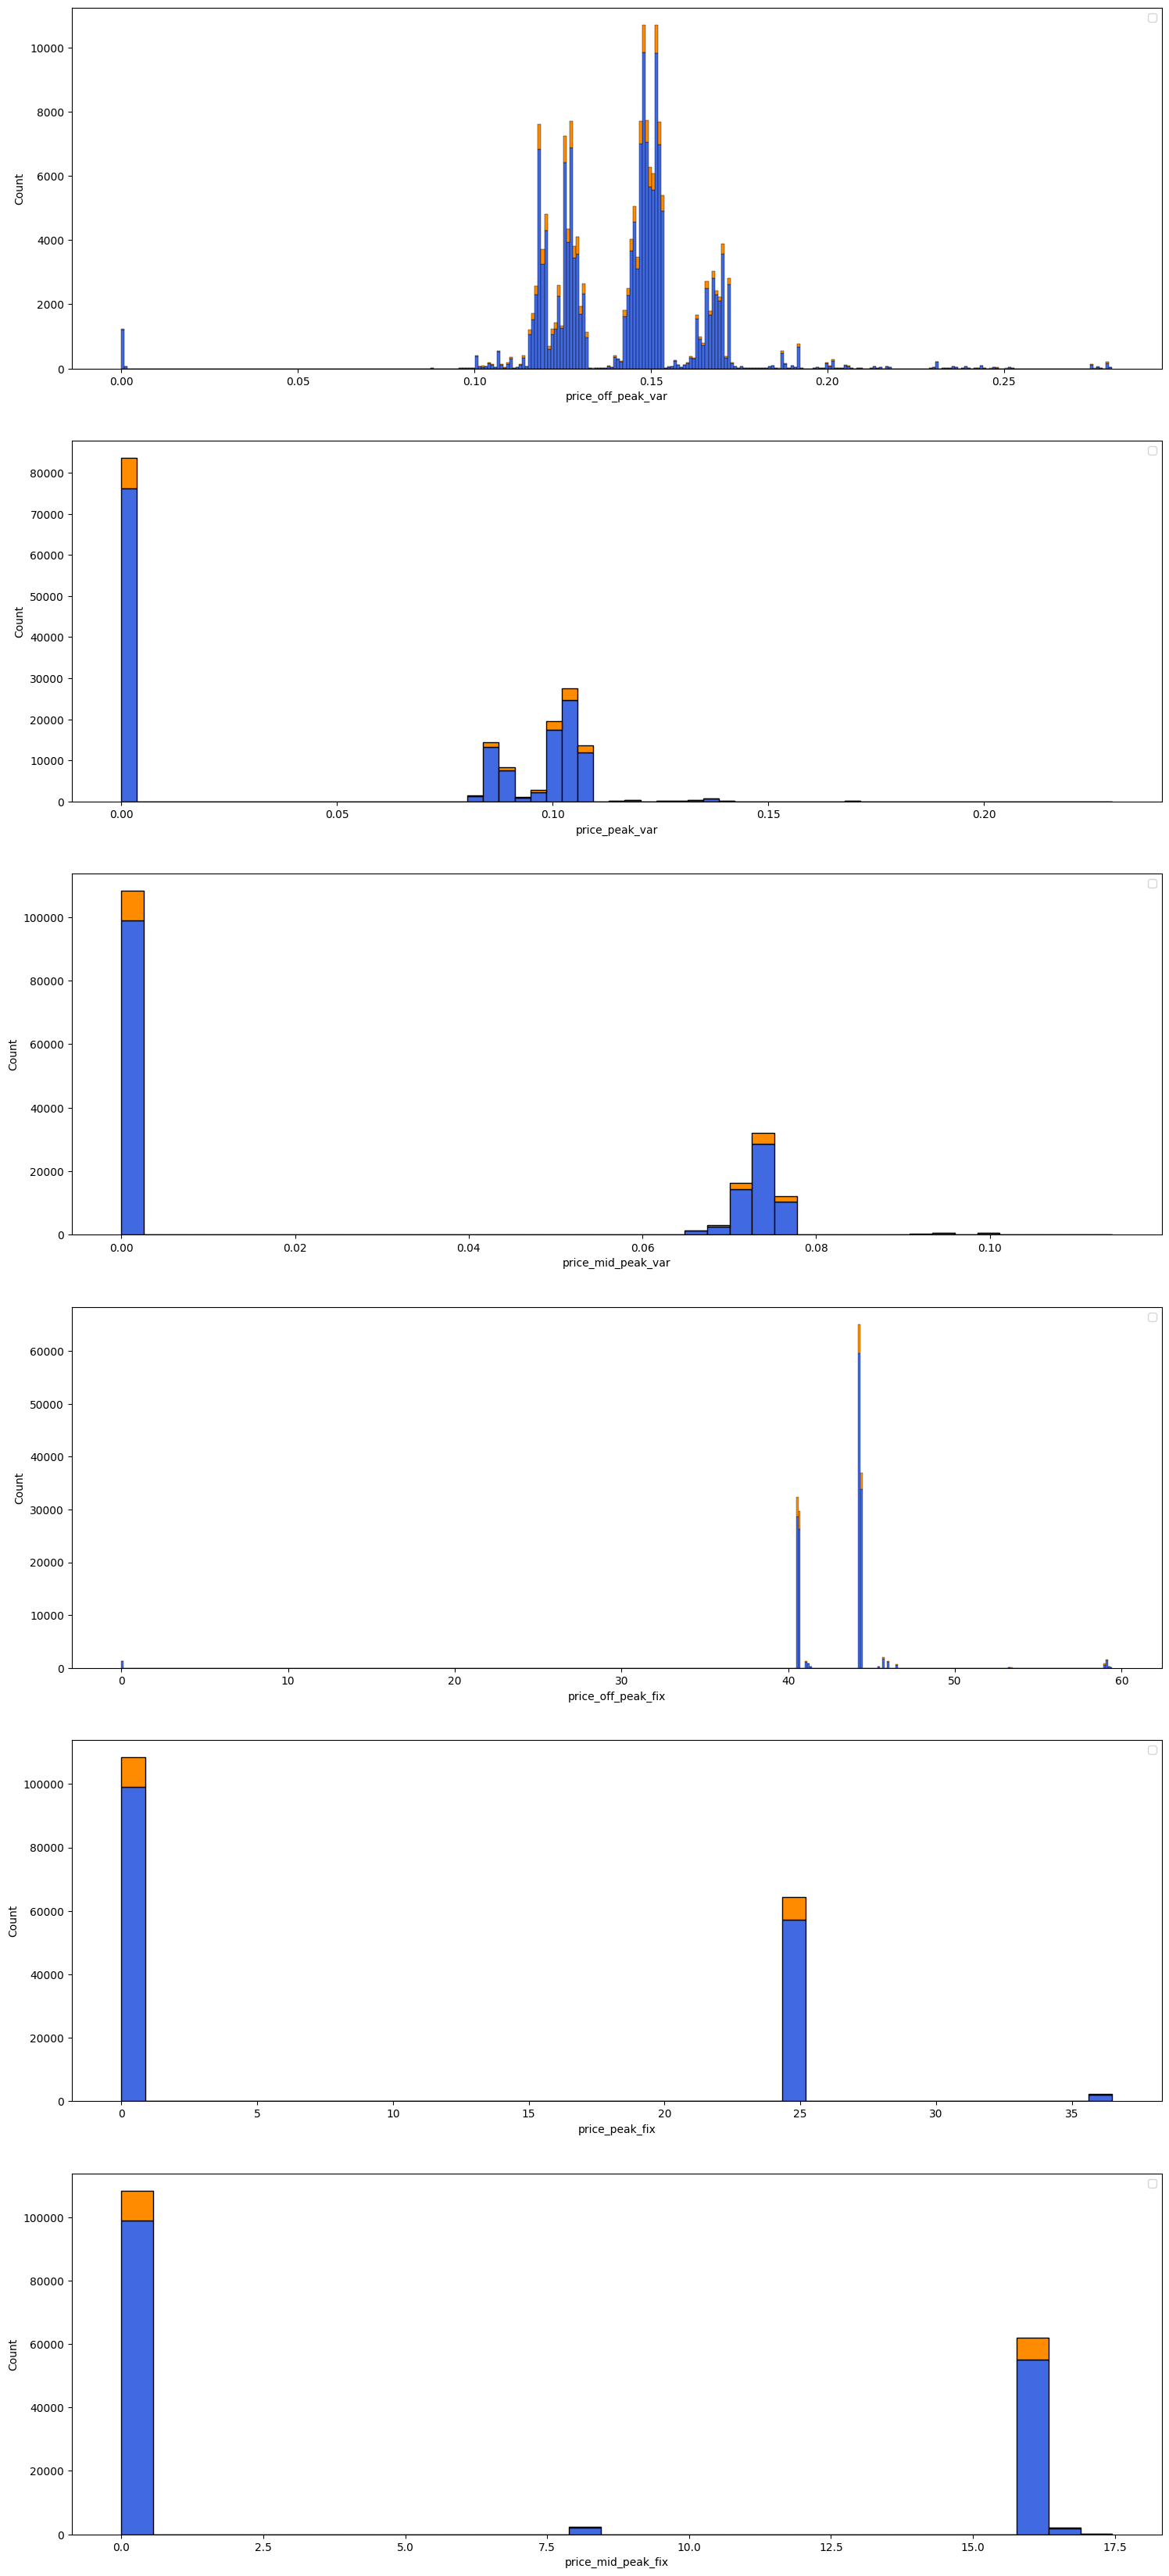

In [27]:
pricecols = price_data.columns[2:]
price_data_churn = price_data.merge(client_data[['id', 'churn', 'nonchurn']], on='id')

fig, axs = plt.subplots(nrows=len(pricecols), figsize=(18, len(pricecols)*7))

for i, col in dict(enumerate(pricecols)).items():
    distribution_plot(price_data_churn, col, axs[i])

#### Some of the quantitative variables are highly skewed. Will consider transformations later.

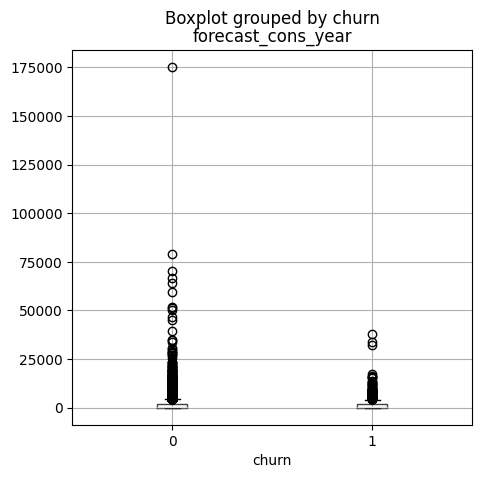

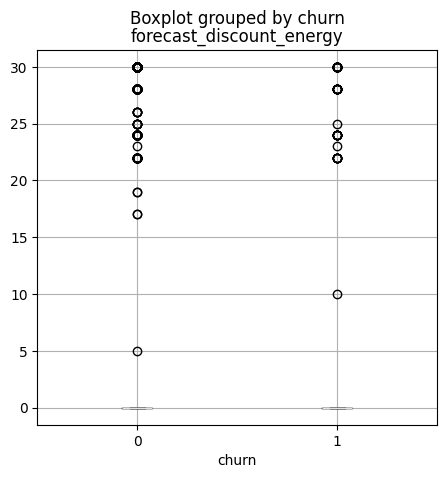

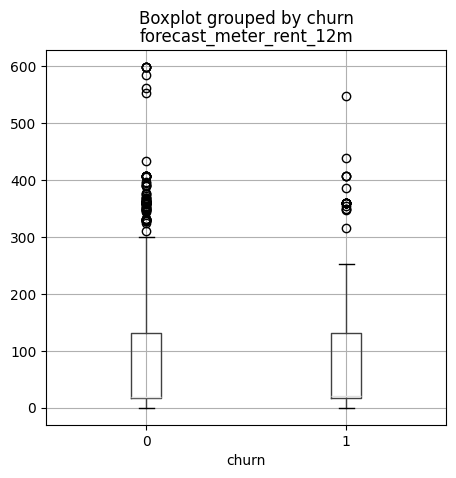

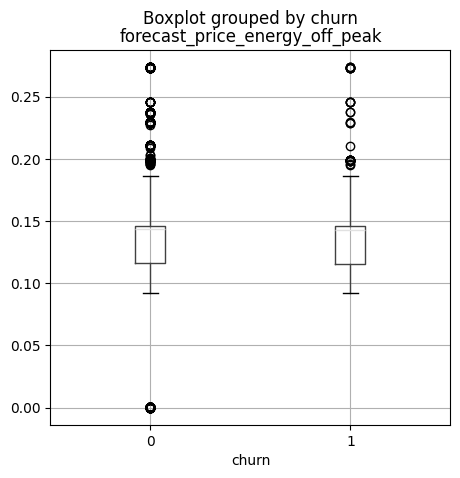

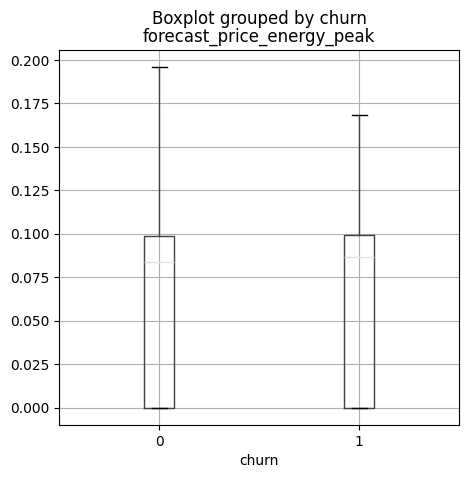

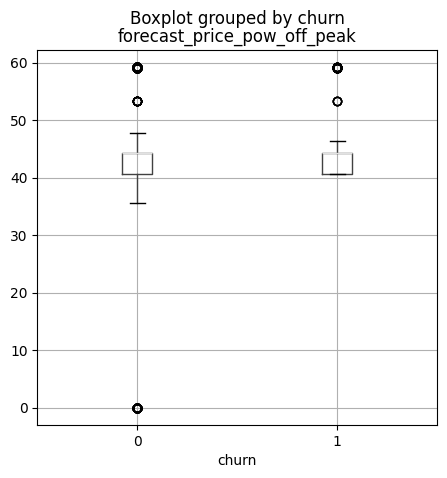

In [28]:
for col in forecastedcols:
    client_data.boxplot(column=col, by='churn', figsize=(5,5))
    plt.title(col)
plt.show()

#### The distributions of the quant variables seem very similar when analyzing churn vs non-churned customers.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------